In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [24]:
# Your package imports here
#Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,precision_score, accuracy_score,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


## The Data

In this project, we will be working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

## Load dataset

In [169]:
# Load the dataset from UCI
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data',
header=None)

In [170]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Since this dataset does not have headers, we will read the data file that I have created.
- Last column is the target column.
- The ID column is dropped.

In [174]:
df = pd.read_csv('WisconsinBreastCancer.csv')
X = df.drop('target', axis=1)
y = df.target

In [175]:
X.head() # X represents all the variables in the dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,9.72,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,0.3539,4.8850,2.230,21.69,0.001713,0.006736,0.000000,0.000000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.000000,0.000000,0.1909,0.06559
1,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,0.1731,1.1420,1.101,14.34,0.003418,0.002252,0.001595,0.001852,0.01613,0.000968,14.000,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
2,12.54,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,0.05185,0.3511,0.9527,2.329,28.30,0.005783,0.004693,0.000793,0.003617,0.02043,0.001058,13.720,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.016350,0.2233,0.05521
3,13.03,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.16,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.050130,0.1987,0.06169
4,12.43,17.00,78.60,477.3,0.07557,0.03454,0.013420,0.016990,0.1472,0.05561,0.3778,2.2000,2.487,31.16,0.007357,0.010790,0.009959,0.011200,0.03433,0.002961,12.900,20.21,81.76,515.9,0.08409,0.04712,0.022370,0.028320,0.1901,0.05932


In [176]:
y.head() # The target vector is y

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Question 1
How many people have cancer?

> Hint: Should be less than 300!

In [177]:
# Code here
df['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

Total number of patients who have cancer are 212


Total number of patients who do not have cancer are 357


### Question 2 
Check the data and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [178]:
# Code here
# Data investigation 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Their are 569 samples and 30 variables in the dataset


30 variables have float as there datatype and target variable has integer as its datatype, that is represented by 'y'


No missing values found in the dataset, all the variables have 569 values and with non-null values


No catogorical values in the dataset 


In [179]:
X.columns # feature names are printed below

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [180]:
X.shape # size of the dataset

(569, 30)

In [181]:
# Missing values
for i in X:
    null = X[i].isnull().sum()/len(X)
    if null>0:
        print("{} 's null rate {} %". format(i, null)) 


No missing values

In [182]:
X.isnull().sum() # No null values in the dataset

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [183]:
X.value_counts 

<bound method DataFrame.value_counts of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0           9.72         18.22           60.73      288.1          0.06950   
1          13.01         22.22           82.01      526.4          0.06251   
2          12.54         18.07           79.42      491.9          0.07436   
3          13.03         18.42           82.61      523.8          0.08983   
4          12.43         17.00           78.60      477.3          0.07557   
..           ...           ...             ...        ...              ...   
564        11.42         20.38           77.58      386.1          0.14250   
565        20.60         29.33          140.10     1265.0          0.11780   
566        14.22         23.12           94.37      609.9          0.10750   
567        11.08         18.83           73.30      361.6          0.12160   
568        12.46         24.04           83.97      475.9          0.11860   

     mean compactness  

The resulting Series will be in descending order so that the first element is the most frequently-occurring row.

### Question 3
- Check the statistical summary of numeric features. Do the variables have values close to each other, or is there large differences?
- What is the variable that has the largest value?
- What is the variable that has the smallest value?

In [184]:
# Code here


Statistical Summary of the numerical values


In [185]:
X.describe().T #(25%, 50%, 75%)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [186]:
X.describe(percentiles=[0.1,0.25,0.45,0.55,0.75,0.95]).T
#Stating from min, 10%, 25%,..... to Maximim Values

,count,mean,std,min,10%,25%,45%,50%,55%,75%,95%,max
mean radius,569.0,14.127292,3.524049,6.981000,10.260000,11.700000,12.996000,13.370000,13.694000,15.780000,20.576000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,14.078000,16.170000,18.342000,18.840000,19.362000,21.800000,27.150000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,65.830000,75.170000,84.066000,86.240000,88.370000,104.100000,135.820000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,321.600000,420.300000,518.280000,551.100000,578.060000,782.700000,1309.800000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.079654,0.086370,0.094034,0.095870,0.097734,0.105300,0.118780,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.049700,0.064920,0.085074,0.092630,0.101740,0.130400,0.208700,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.013686,0.029560,0.052838,0.061540,0.071450,0.130700,0.243020,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.011158,0.020310,0.029998,0.033500,0.040196,0.074000,0.125740,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.149580,0.161900,0.175620,0.179200,0.181840,0.195700,0.230720,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.055338,0.057700,0.060962,0.061540,0.062302,0.066120,0.076090,0.09744


Most of the variables are close to each other eg: "worst symmetry", "worst fractal dimension"
variable "mean variable" has largest value    

In [187]:
X.max()  # Gives the maximum value of each variable

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

The variable with largest number  in the whole dataset is "Worst area" with 4254 numerical value

In [188]:
X.min() # Gives the least value in the dataset

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

There are number of least variable values, the list is given below:
mean concavity               0.000000

mean concave points          0.000000

concavity error              0.000000

concave points error         0.000000

worst concavity              0.000000

worst concave points         0.000000

### Question 4 
These features are all engineered from images. I suspect there is some variables with large correlation. Are there largely correlated variables? Why do you think they are largely correlated? Comment on a few.
- Calculate correlation.
- Create a correlation heatmap.
- Comment on largely correlated variables.

In [189]:
# Code here
#Calculate Correlation 
X.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Negative correlation: In the above table on the left, the y values tend to decrease as the x values increase. This shows strong negative correlation, which occurs when large values of one feature correspond to small values of the other, and vice versa.

In [190]:
#Create correlation heat map


Heat map of the correlation matrix

Since there are more number of variables in the dataset, we can use heat map to present it visually and where
each field has a color that corresponds to its values and gives the linear relationship between different variables.
The values are negatives correlated.

<AxesSubplot:>

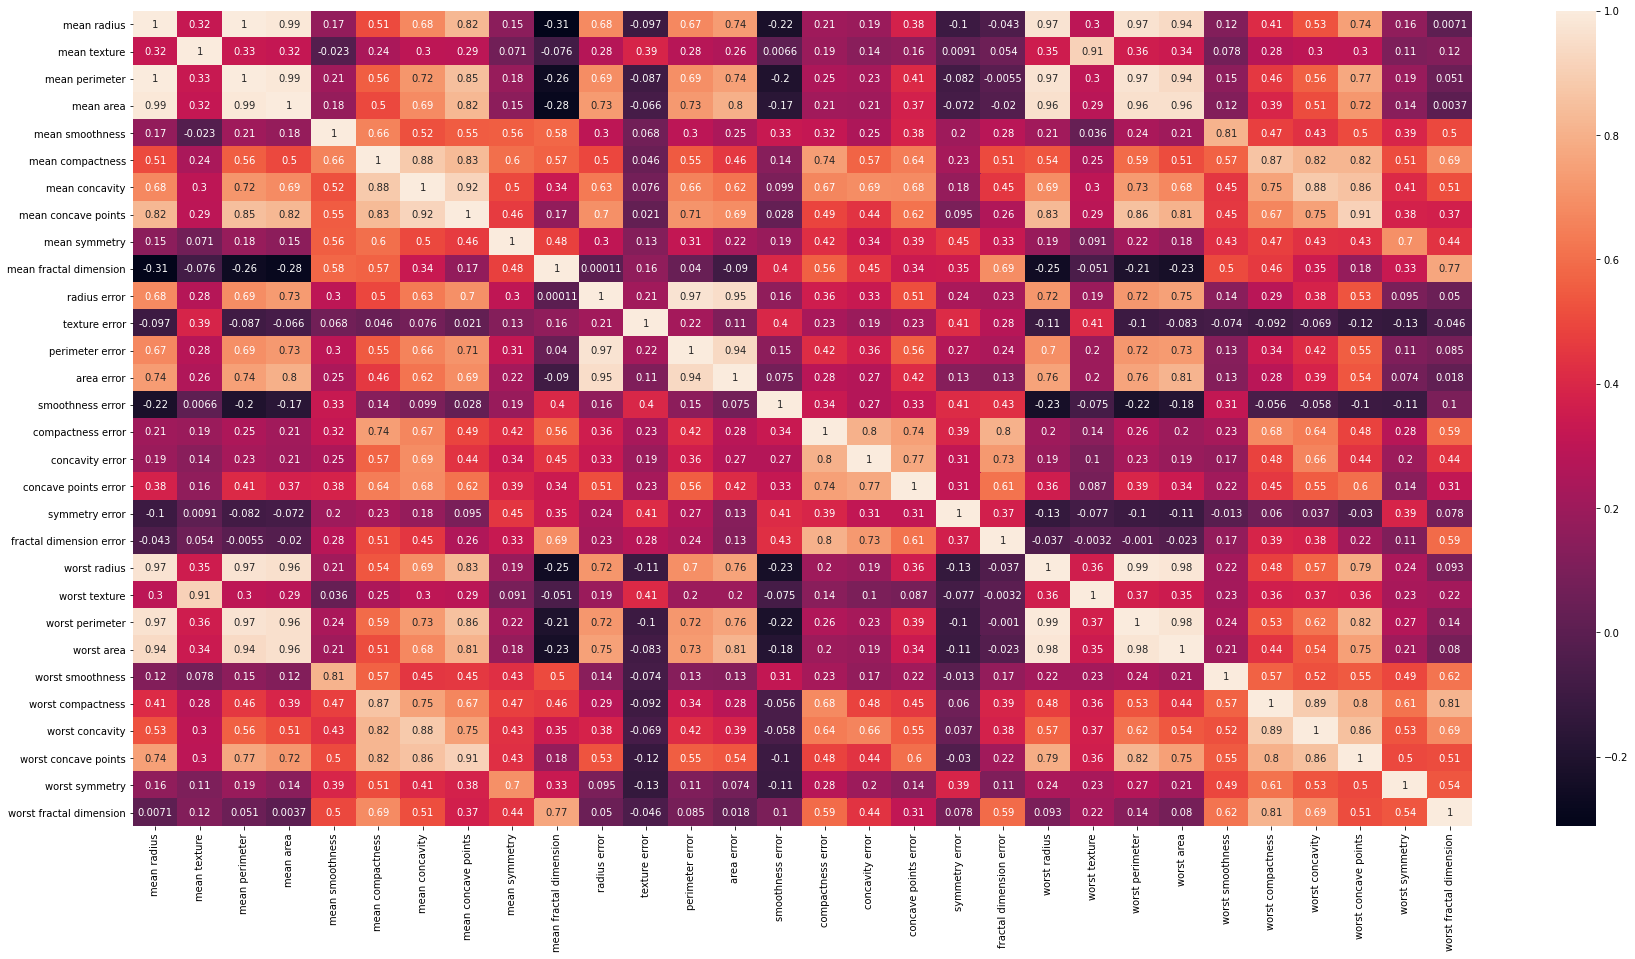

In [191]:
plt.figure(figsize = (30, 15))
sns.heatmap(X.corr(),annot=True)

The line 1 going from top left to bottom right is the main diagonal which shows that each variable perfectly correlates with itself. The matrix is symmetrical with same correlation is shown above the main diagonal being a mirror image of those below the diagonal

In [192]:
#Comments on largely correlated variables

Observations

1. All the above variables are highly correlated with each other
2. correlation matrixes acts as inputs for exploratory factor analysis, confirmatory factor analysis and linear regression when excluding missing values pairwise
3. Can be used as diagnostic when checking other analyses

### Question 5 
**Train - Test split** 
- Use sklearn's `tran_test_split()` function to create the split.
- Use `random_state = 55` to create consistent and repeatable train-test splits.

- What is the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
- What is the importance of stratified sampling?

In [193]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [194]:
# Code here
#The portion of cancer classes in X_trained dataset after splitting  
print(len(X_train))

426


In [195]:
#The portion of cancer classes in y_trained dataset after splitting  
print(len(y_train))

426


In [196]:
# The portion of cancer classes in X_test dataset after splitting
print(len(X_test))


143


In [197]:
# The portion of cancer classes in y_test dataset after splitting
print(len(y_test))


143


After splitting the trained and test datasets are equal 

What is the importance of stratified sampling?

With the help of stratified sampling, the dataset can be studied more effectively by obtaining the sample and dividing into
groups. Stratified sampling provides greater presecion when compared to random sampling.

### Question 6 

- Initiate the logistic regression classifier from the sklearn library as shown below.
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or use the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - False Positive Rate
     - F1 Score

In [198]:
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)

In [199]:
# Code here
reg = LogisticRegression() # Intialize the model
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)
clf.fit(X_train, y_train)


LogisticRegression(C=0.1, max_iter=10000)

In [200]:
#Accuracy of training and testing dataset

In [201]:
#Accuracy of traning set and Classification report/ 
pred = clf.predict(X_train) #use the model to predict the labels of the train data
print("Accuracy of the training set:", metrics.accuracy_score(y_true = y_train, y_pred = pred)) #gives metrics accuracy
#Classification report 
print("classification report of training set is: \n",classification_report(y_true = y_train, y_pred = pred))

Accuracy of the training set: 0.9436619718309859
classification report of training set is: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       267
           1       0.93      0.92      0.92       159

    accuracy                           0.94       426
   macro avg       0.94      0.94      0.94       426
weighted avg       0.94      0.94      0.94       426



Classification report gives the precision, recall, F1 score and support values of the training set

In [202]:
#Confusion matric function

In [203]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    "plot confusion matrix"
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels =classes,vmin=0.,vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
        plt.title(title)
        plt.ylabel("True label")
        plt.xlabel("predicted label")


In [204]:
#Visualizing cm
cm = confusion_matrix(y_true = y_train, y_pred = pred)
cm
# I have predicted 258 0's correct , 11'0s as 1


array([[256,  11],
       [ 13, 146]], dtype=int64)

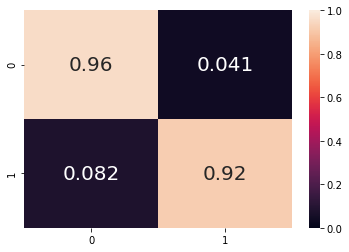

In [205]:
#Normalize the cm
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = clf.classes_, title='confusion matrix')

For zeros we have a total of 100% however, we have only predicted  96% 0's correctly

There 0.041 true label 0's but we actually predicted them as 1's

we have predicted 92%  of 1's correctly and 0.082 of 1's as 0's wrongly 


Specificity
Precision
False Positive Rate


In [206]:
clf.classes_
cm.sum(axis=1)
cm_norm
# predicted almost 95% of 1 correct and alomts 4 percent them wrong etc

array([[0.9588015 , 0.0411985 ],
       [0.08176101, 0.91823899]])

In [207]:
print(cm) #The confusion matrix array
print(cm.sum(axis=0)) #Sum of the confusion matrix
print(np.diag(cm)) # Sum of the values diaginally 

[[256  11]
 [ 13 146]]
[269 157]
[256 146]


In [208]:
# Calculate false positive (FP), False negative(FN), True Positive(TP) and True Negative(TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) -np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() -(FP+FN+TP)
#Sensitivity, hit rate, recall or predcitive value
TPR = TP / (TP +FN)
print("The True Positive Rate is:", TPR)
# Precision or positive predictive value
PPV = TP / (TP +FP)
print("The Precision is:", PPV)
#False positive rate or false alarm rate
FPR = FP / (FP+TN)
print("The False positive rate is:", FPR)
#False negative rate or Miss rate
FNR = FN/ (FN +TP)
print("The false negative rate is:", FNR)



## Total Averages:
print("The average TPR is:", TPR.sum()/2)
print("The Precision is:", PPV.sum()/2)
print("The average False positive rate is", FPR.sum()/2)
print("The average False negative rate is", FNR.sum()/2)

The True Positive Rate is: [0.9588015  0.91823899]
The Precision is: [0.95167286 0.92993631]
The False positive rate is: [0.08176101 0.0411985 ]
The false negative rate is: [0.0411985  0.08176101]
The average TPR is: 0.9385202459190163
The Precision is: 0.9408045840930078
The average False positive rate is 0.061479754080983676
The average False negative rate is 0.061479754080983676


In [209]:
#Accuracy of testing set and Classification report
pred = clf.predict(X_test) #use the model to predict the labels of the test data
print("Accuracy of the testing set:", metrics.accuracy_score(y_true = y_test, y_pred = pred)) #gives metrics accuracy
#Classification report 
print("classification report of testing set is: \n",classification_report(y_true = y_test, y_pred = pred))

Accuracy of the testing set: 0.958041958041958
classification report of testing set is: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



Classification report gives the precision, recall, F1 score and support values of the testing set

In [210]:
#Confusion matric function of testing set

In [211]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    "plot confusion matrix"
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels =classes,vmin=0.,vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
        plt.title(title)
        plt.ylabel("True label")
        plt.xlabel("predicted label")


In [212]:
#Visualizing  confusion matrix - cm
cm = confusion_matrix(y_true = y_test, y_pred = pred)
cm
# I have predicted 87 0's correct , 3'0s as 1

array([[87,  3],
       [ 3, 50]], dtype=int64)

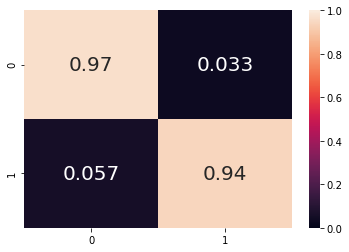

In [213]:
#Normalize the cm
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = clf.classes_, title='confusion matrix')

For zeros we have a total of 100% however, we have only predicted  97% 0's correctly

There 0.033 true label 0's but we actually predicted them as 1's

we have predicted 94%  of 1's correctly and 0.057 of 1's as 0's wrongly 

In [214]:
clf.classes_

array([0, 1], dtype=int64)

In [215]:
cm.sum(axis=1)
cm_norm
# predicted almost 96% of 1 correct and alomts 4 percent them wrong etc

array([[0.96666667, 0.03333333],
       [0.05660377, 0.94339623]])

In [216]:
print(cm) #The confusion matrix array
print(cm.sum(axis=0)) #Sum of the confusion matrix
print(np.diag(cm)) # Sum of the values diaginally 

[[87  3]
 [ 3 50]]
[90 53]
[87 50]


In [217]:
# Calculate false positive (FP), False negative(FN), True Positive(TP) and True Negative(TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) -np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() -(FP+FN+TP)
#Sensitivity, hit rate, recall or predcitive value
TPR = TP / (TP +FN)
print("The True Positive Rate is:", TPR)
# Precision or positive predictive value
PPV = TP / (TP +FP)
print("The Precision is:", PPV)
#False positive rate or false alarm rate
FPR = FP / (FP+TN)
print("The False positive rate is:", FPR)
#False negative rate or Miss rate
FNR = FN/ (FN +TP)
print("The false negative rate is:", FNR)



## Total Averages:
print("The average TPR is:", TPR.sum()/2)
print("The Precision is:", PPV.sum()/2)
print("The average False positive rate is", FPR.sum()/2)
print("The average False negative rate is", FNR.sum()/2)

The True Positive Rate is: [0.96666667 0.94339623]
The Precision is: [0.96666667 0.94339623]
The False positive rate is: [0.05660377 0.03333333]
The false negative rate is: [0.03333333 0.05660377]
The average TPR is: 0.9550314465408805
The Precision is: 0.9550314465408805
The average False positive rate is 0.0449685534591195
The average False negative rate is 0.0449685534591195


### Question 7 

- Initiate the k-nearest neighbours classifier from the sklearn library with n_neighbors=1. Keep the remaining parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [218]:
# Code here
knn=KNeighborsClassifier(n_neighbors=1) # Initiate the k-nearest neighbours classifier

knn.fit(X_train,y_train) # Fit the model

#metrics to get the following metrics on the training set: Recall (Sensitivity), Specificity, Precision, F1 Score
y_pred=knn.predict(X_train)

print("Accuarcy score of test set is", metrics.accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))    # Confusion matrix
print("Training Score: ",knn.score(X_test,y_test)*100) 
print(knn.score(X_test,y_test))

Accuarcy score of test set is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

[[267   0]
 [  0 159]]
Training Score:  91.6083916083916
0.916083916083916


In [219]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    "plot confusion matrix"
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels =classes,vmin=0.,vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
        plt.title(title)
        plt.ylabel("True label")
        plt.xlabel("predicted label")


In [220]:
#Visualizing  confusion matrix - cm
cm = confusion_matrix(y_train,y_pred)
cm
# I have predicted 267 0's correct , 0's as 1

array([[267,   0],
       [  0, 159]], dtype=int64)

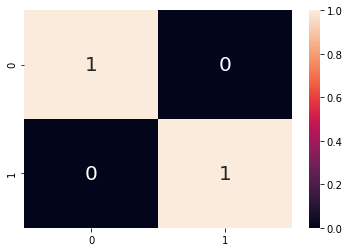

In [221]:
#Normalize the cm
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = clf.classes_, title='confusion matrix')

For zeros we have a total of 100% however, we have only predicted  1% 0's correctly

There 0 true label 0's but we actually predicted them as 1's

we have predicted 0  of 1's correctly and 1 of 1's as 0's wrongly 

In [222]:

cm.sum(axis=1)
cm_norm

array([[1., 0.],
       [0., 1.]])

In [223]:

print(cm) #The confusion matrix array
print(cm.sum(axis=0)) #Sum of the confusion matrix
print(np.diag(cm)) # Sum of the values diaginally 

[[267   0]
 [  0 159]]
[267 159]
[267 159]


In [224]:
# Calculate false positive (FP), False negative(FN), True Positive(TP) and True Negative(TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) -np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() -(FP+FN+TP)
#Sensitivity, hit rate, recall or predcitive value
TPR = TP / (TP +FN)
print("The True Positive Rate is:", TPR)
# Precision or positive predictive value
PPV = TP / (TP +FP)
print("The Precision is:", PPV)
#False positive rate or false alarm rate
FPR = FP / (FP+TN)
print("The False positive rate is:", FPR)
#False negative rate or Miss rate
FNR = FN/ (FN +TP)
print("The false negative rate is:", FNR)



## Total Averages:
print("The average TPR is:", TPR.sum()/2)
print("The Precision is:", PPV.sum()/2)
print("The average False positive rate is", FPR.sum()/2)
print("The average False negative rate is", FNR.sum()/2)


The True Positive Rate is: [1. 1.]
The Precision is: [1. 1.]
The False positive rate is: [0. 0.]
The false negative rate is: [0. 0.]
The average TPR is: 1.0
The Precision is: 1.0
The average False positive rate is 0.0
The average False negative rate is 0.0


In [225]:
# Code here
knn=KNeighborsClassifier(n_neighbors=1) # Initiate the k-nearest neighbours classifier

knn.fit(X_train,y_train) # Fit the model

#metrics to get the following metrics on the testing set: Recall (Sensitivity), Specificity, Precision, F1 Score
y_pred=knn.predict(X_test)

print("Accuarcy score of test set is", accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))    # Confusion matrix
print("Testing Score: ",knn.score(X_train,y_train)*100) 
print(knn.score(X_test,y_test))

Accuarcy score of test set is 91.6083916083916
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        90
           1       0.89      0.89      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

[[84  6]
 [ 6 47]]
Testing Score:  100.0
0.916083916083916


In [226]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    "plot confusion matrix"
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels =classes,vmin=0.,vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
        plt.title(title)
        plt.ylabel("True label")
        plt.xlabel("predicted label")


In [227]:
#Visualizing  confusion matrix - cm
cm = confusion_matrix(y_test,y_pred)
cm
# I have predicted 87 0's correct , 3'0s as 1

array([[84,  6],
       [ 6, 47]], dtype=int64)

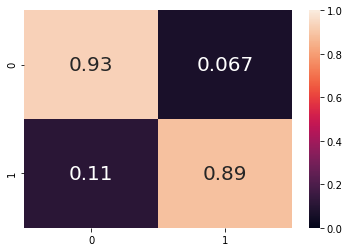

In [228]:
#Normalize the cm
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = clf.classes_, title='confusion matrix')

For zeros we have a total of 100% however, we have only predicted  93% 0's correctly

There 0.067 true label 0's but we actually predicted them as 1's

we have predicted 89%  of 1's correctly and 0.11 of 1's as 0's wrongly 

In [229]:
print(cm) #The confusion matrix array
print(cm.sum(axis=0)) #Sum of the confusion matrix
print(np.diag(cm)) # Sum of the values diaginally 

[[84  6]
 [ 6 47]]
[90 53]
[84 47]


In [230]:
print(cm) #The confusion matrix array
print(cm.sum(axis=0)) #Sum of the confusion matrix
print(np.diag(cm)) # Sum of the values diaginally 

# Calculate false positive (FP), False negative(FN), True Positive(TP) and True Negative(TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) -np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() -(FP+FN+TP)
#Sensitivity, hit rate, recall or predcitive value
TPR = TP / (TP +FN)
print("The True Positive Rate is:", TPR)
# Precision or positive predictive value
PPV = TP / (TP +FP)
print("The Precision is:", PPV)
#False positive rate or false alarm rate
FPR = FP / (FP+TN)
print("The False positive rate is:", FPR)
#False negative rate or Miss rate
FNR = FN/ (FN +TP)
print("The false negative rate is:", FNR)



## Total Averages:
print("The average TPR is:", TPR.sum()/2)
print("The Precision is:", PPV.sum()/2)
print("The average False positive rate is", FPR.sum()/2)
print("The average False negative rate is", FNR.sum()/2)


[[84  6]
 [ 6 47]]
[90 53]
[84 47]
The True Positive Rate is: [0.93333333 0.88679245]
The Precision is: [0.93333333 0.88679245]
The False positive rate is: [0.11320755 0.06666667]
The false negative rate is: [0.06666667 0.11320755]
The average TPR is: 0.910062893081761
The Precision is: 0.910062893081761
The average False positive rate is 0.089937106918239
The average False negative rate is 0.089937106918239


### Question 8 

- Initiate the Gaussian Naive Bayes classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [231]:
# Code here
G = GaussianNB()
G.fit(X_train,y_train)
#Accuracy of training and testing dataset
#Accuracy of traning set and Classification report/ 
pred = G.predict(X_train) #use the model to predict the labels of the train data
print("Accuracy of the training set:", metrics.accuracy_score(y_true = y_train, y_pred = pred)) #gives metrics accuracy
#Classification report 
print("classification report of training set is: \n",classification_report(y_true = y_train, y_pred = pred))


Accuracy of the training set: 0.9483568075117371
classification report of training set is: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       267
           1       0.95      0.91      0.93       159

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.94       426
weighted avg       0.95      0.95      0.95       426



In [232]:
#Confusion matric function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    "plot confusion matrix"
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels =classes,vmin=0.,vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
        plt.title(title)
        plt.ylabel("True label")
        plt.xlabel("predicted label")


In [233]:

#Visualizing cm
cm = confusion_matrix(y_true = y_train, y_pred = pred)
cm



array([[260,   7],
       [ 15, 144]], dtype=int64)

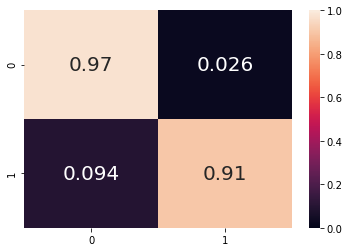

In [234]:

#Visualizing cm
cm = confusion_matrix(y_true = y_train, y_pred = pred)
cm

#Normalize the cm
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = clf.classes_, title='confusion matrix')



In [235]:

cm.sum(axis=1)
cm_norm


array([[0.97378277, 0.02621723],
       [0.09433962, 0.90566038]])

In [236]:
print(cm) #The confusion matrix array
print(cm.sum(axis=0)) #Sum of the confusion matrix
print(np.diag(cm)) # Sum of the values diaginally 


[[260   7]
 [ 15 144]]
[275 151]
[260 144]


In [237]:

# Calculate false positive (FP), False negative(FN), True Positive(TP) and True Negative(TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) -np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() -(FP+FN+TP)
#Sensitivity, hit rate, recall or predcitive value
TPR = TP / (TP +FN)
print("The True Positive Rate is:", TPR)
# Precision or positive predictive value
PPV = TP / (TP +FP)
print("The Precision is:", PPV)
#False positive rate or false alarm rate
FPR = FP / (FP+TN)
print("The False positive rate is:", FPR)
#False negative rate or Miss rate
FNR = FN/ (FN +TP)
print("The false negative rate is:", FNR)



## Total Averages:
print("The average TPR is:", TPR.sum()/2)
print("The Precision is:", PPV.sum()/2)
print("The average False positive rate is", FPR.sum()/2)
print("The average False negative rate is", FNR.sum()/2)



The True Positive Rate is: [0.97378277 0.90566038]
The Precision is: [0.94545455 0.95364238]
The False positive rate is: [0.09433962 0.02621723]
The false negative rate is: [0.02621723 0.09433962]
The average TPR is: 0.9397215744470355
The Precision is: 0.9495484647802528
The average False positive rate is 0.06027842555296446
The average False negative rate is 0.06027842555296446


In [238]:
#Accuracy of testing set and Classification report
pred = G.predict(X_test) #use the model to predict the labels of the test data
print("Accuracy of the testing set:", metrics.accuracy_score(y_true = y_test, y_pred = pred)) #gives metrics accuracy
#Classification report 
print("classification report of testing set is: \n",classification_report(y_true = y_test, y_pred = pred))


Accuracy of the testing set: 0.9440559440559441
classification report of testing set is: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        90
           1       0.96      0.89      0.92        53

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



In [239]:
#Confusion matric function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    "plot confusion matrix"
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels =classes,vmin=0.,vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
        plt.title(title)
        plt.ylabel("True label")
        plt.xlabel("predicted label")

In [240]:

#Visualizing cm
cm = confusion_matrix(y_true = y_test, y_pred = pred)
cm

array([[88,  2],
       [ 6, 47]], dtype=int64)

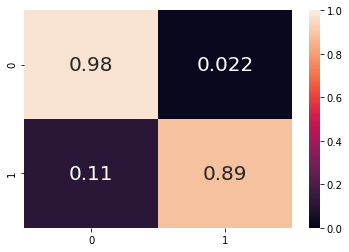

In [241]:
#Normalize the cm
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = clf.classes_, title='confusion matrix')

For zeros we have a total of 100% however, we have only predicted  98% 0's correctly

There 0.022 true label 0's but we actually predicted them as 1's

we have predicted 89%  of 1's correctly and 0.11 of 1's as 0's wrongly 

In [242]:
cm.sum(axis=1)
cm_norm
# predicted almost 97% of 1 correct and alomts 3 percent them wrong etc


array([[0.97777778, 0.02222222],
       [0.11320755, 0.88679245]])

In [243]:

print(cm) #The confusion matrix array
print(cm.sum(axis=0)) #Sum of the confusion matrix
print(np.diag(cm)) # Sum of the values diaginally 

[[88  2]
 [ 6 47]]
[94 49]
[88 47]


In [244]:
# Calculate false positive (FP), False negative(FN), True Positive(TP) and True Negative(TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) -np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() -(FP+FN+TP)
#Sensitivity, hit rate, recall or predcitive value
TPR = TP / (TP +FN)
print("The True Positive Rate is:", TPR)
# Precision or positive predictive value
PPV = TP / (TP +FP)
print("The Precision is:", PPV)
#False positive rate or false alarm rate
FPR = FP / (FP+TN)
print("The False positive rate is:", FPR)
#False negative rate or Miss rate
FNR = FN/ (FN +TP)
print("The false negative rate is:", FNR)



## Total Averages:
print("The average TPR is:", TPR.sum()/2)
print("The Precision is:", PPV.sum()/2)
print("The average False positive rate is", FPR.sum()/2)
print("The average False negative rate is", FNR.sum()/2)

The True Positive Rate is: [0.97777778 0.88679245]
The Precision is: [0.93617021 0.95918367]
The False positive rate is: [0.11320755 0.02222222]
The false negative rate is: [0.02222222 0.11320755]
The average TPR is: 0.9322851153039833
The Precision is: 0.9476769431176726
The average False positive rate is 0.06771488469601677
The average False negative rate is 0.06771488469601677


### Question 9 

In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
C is the inverse of the regularization parameter $\lambda$. As C increases, the penalty decreases.
- Create a loop and fit the models using each C value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Plot the validation curve based on each C value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [245]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    # Code here

In [246]:
x_mean = X.mean()
x_std = X.std()
x_norm = (X - x_mean)/x_std
print (x_norm.shape)

(569, 30)


In [247]:
from sklearn import linear_model #for logistic regression
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict, validation_curve 
#GridSearchCV is used to optimize parameters of the models used
logreg = linear_model.LogisticRegression()
kfold = KFold(n_splits=5,random_state=7)
cv_results = cross_val_score(logreg, x_norm, y, cv=kfold)
print (cv_results.mean()*100, "%")

97.18677224033534 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [248]:
logreg = linear_model.LogisticRegression()
param_grid = {"C":[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]}
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=kfold)
grid.fit(x_norm,y)
print (grid.best_estimator_)
print (grid.best_score_*100, "%")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=0.1)
97.36376339077782 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=C, param_range=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

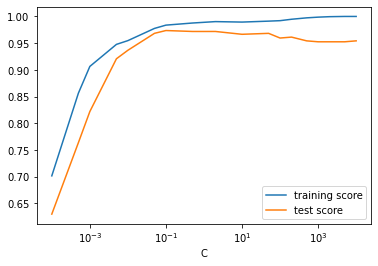

In [249]:
#plot validation curve
num_splits = 5
num_C_values = 19 # we iterate over 10 possible C values
logreg = linear_model.LogisticRegression()
kfold = KFold(n_splits=5,random_state=7)
C_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
train_scores, valid_scores = validation_curve(logreg, x_norm, y, "C", C_values, cv=kfold)
train_scores = pd.DataFrame(data=train_scores, index=np.arange(0, num_C_values), columns=np.arange(0,num_splits)) 
valid_scores = pd.DataFrame(data=valid_scores, index=np.arange(0, num_C_values), columns=np.arange(0,num_splits)) 
plt.semilogx(C_values, train_scores.mean(axis=1), label='training score')
plt.semilogx(C_values, valid_scores.mean(axis=1), label='test score')
plt.xlabel('C')
plt.legend()

## Question 10 

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each K value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [250]:
#This function concatenate test and train scores in a dataframe
def prepare_dataframe(test_score_dict,train_score_dict,key,columns):
    df_test = pd.DataFrame(test_score_dict,index = ["Test Score"])
    df_train = pd.DataFrame(train_score_dict,index = ["Train Score"])
    np_result = np.concatenate([df_test,df_train],axis = 0)
    df_result = pd.DataFrame(np_result)

    df_result.index = ["Test Score","Train Score"]
    df_result.columns = [key + str(c) for c in columns]  
    return df_result

In [159]:
#Implementing KNN algoritms with different parameters
def knn_model(n_neighbors = 1,weights = 'uniform',algorithm = 'auto',p = 2):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights,
                               algorithm = algorithm,
                               p = p
                              )
    
    accuracies_train = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 3)
    train_score = np.mean(accuracies_train)
    
    knn.fit(X_train,y_train)
    test_score = knn.score(X_test,y_test)
   
    return train_score, test_score

In [160]:
result_train = {}
result_test = {}

In [161]:
#KNN algorithm implementation with default parameters
train_score,test_score = knn_model()
result_train["Default-Train"] = train_score
result_test["Default-Test"] = test_score
print("Mean accuracy of train set:",train_score)
print("Mean accuracy of test set:", test_score) 

Mean accuracy of train set: 0.7733333333333333
Mean accuracy of test set: 0.76


In [164]:
#KNN algorith implementation with different n_neighbors 
k_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
test_score_dict = {}
train_score_dict = {}

for k in k_list:
    train_score,test_score = knn_model(n_neighbors = 1)
    train_score_dict[k] = (train_score)
    test_score_dict[k] = (test_score)
df_result = prepare_dataframe(test_score_dict,train_score_dict,"K = ",k_list)
df_result

,K = 1,K = 3,K = 5,K = 7,K = 9,K = 15,K = 19,K = 25,K = 29,K = 35,K = 39,K = 45,K = 49,K = 99
Test Score,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000
Train Score,0.773333,0.773333,0.773333,0.773333,0.773333,0.773333,0.773333,0.773333,0.773333,0.773333,0.773333,0.773333,0.773333,0.773333


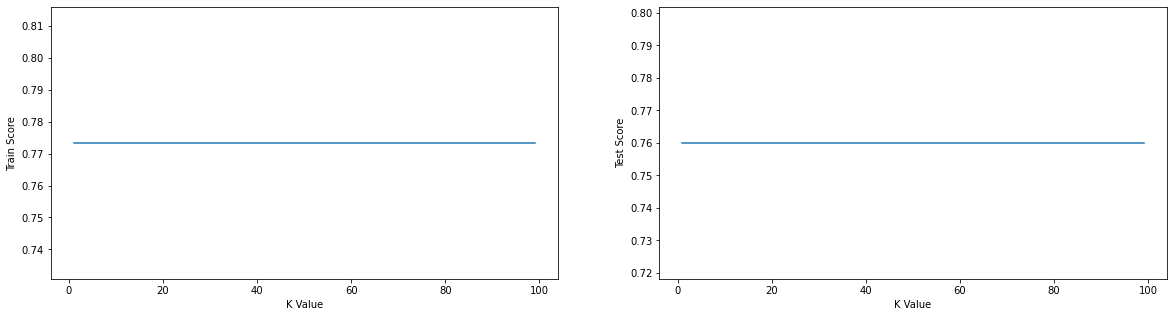

In [165]:
#Plot score of different k values for test and train datas
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(k_list,list(train_score_dict.values()))
plt.xlabel("K Value")
plt.ylabel("Train Score")

plt.subplot(1,2,2)
plt.plot(k_list,list(test_score_dict.values()))
plt.xlabel("K Value")
plt.ylabel("Test Score")
plt.show()

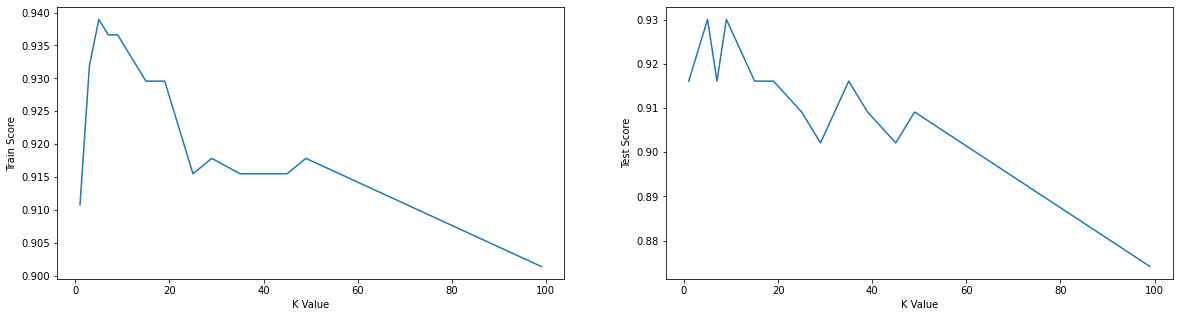

In [110]:
#Plot score of different k values for test and train datas
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(k_list,list(train_score_dict.values()))
plt.xlabel("K Value")
plt.ylabel("Train Score")

plt.subplot(1,2,2)
plt.plot(k_list,list(test_score_dict.values()))
plt.xlabel("K Value")
plt.ylabel("Test Score")
plt.show()

### Question 11 

- The validation curve for logistic regression seems a bit weird. That might have to do with the fact that the data is not normalized.
- Apply standardization to the data and re-do Quesion 9 and plot the validation curve for logistic regression models with same parameter range for C. 
- Plot the validation curve. What do you see? 
- Which value would you choose for C in logistic regression? Why?

In [115]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_classification


In [140]:
#scaling data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=C, param_range=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


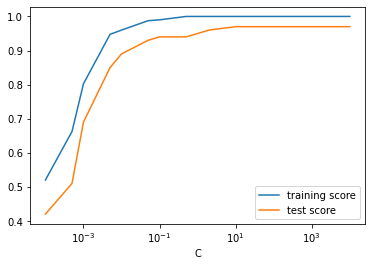

In [142]:
# Code here
#scaling data
#plot validation curve
num_splits = 5
num_C_values = 19 # we iterate over 10 possible C values
logreg = linear_model.LogisticRegression()
kfold = KFold(n_splits=5,random_state=7)
C_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
train_scores, valid_scores = validation_curve(logreg, x_norm, y, "C", C_values, cv=kfold)
train_scores = pd.DataFrame(data=train_scores, index=np.arange(0, num_C_values), columns=np.arange(0,num_splits)) 
valid_scores = pd.DataFrame(data=valid_scores, index=np.arange(0, num_C_values), columns=np.arange(0,num_splits)) 
plt.semilogx(C_values, train_scores.mean(axis=1), label='training score')
plt.semilogx(C_values, valid_scores.mean(axis=1), label='test score')
plt.xlabel('C')
plt.legend()

### Question 12 

In [138]:
X_train.shape


(75, 20)

In [139]:
X_train[0:426,:].shape

(75, 20)

- After choosing your best C value, let's check the learning curve.
- Create a logistic regression model of your chosen C value, and the other parameters the same as before.
- Starting from 1 data point in the training set, increase your training set size by 1 point in each iteration, fit the model, get the accuracy scores for both the current training and test sets.
- Increase the training set size consecutively. Do not randomly select data points. (`X_train_ss[0:N,:] where N = {1,2,3,...,len(X_train_ss)}`)
- Plot the learning curve. What do you see? Comment on your finding. 

In [ ]:
# Code here

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=C, param_range=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


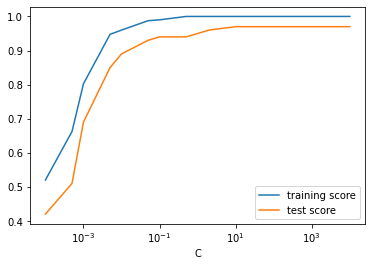

In [168]:
#plot validation curve
num_splits = 5
num_C_values = 19 # we iterate over 10 possible C values
logreg = linear_model.LogisticRegression()
kfold = KFold(n_splits=5,random_state=7)
C_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
train_scores, valid_scores = validation_curve(logreg, x_norm, y, "C", C_values, cv=kfold)
train_scores = pd.DataFrame(data=train_scores, index=np.arange(0, num_C_values), columns=np.arange(0,num_splits)) 
valid_scores = pd.DataFrame(data=valid_scores, index=np.arange(0, num_C_values), columns=np.arange(0,num_splits)) 
plt.semilogx(C_values, train_scores.mean(axis=1), label='training score')
plt.semilogx(C_values, valid_scores.mean(axis=1), label='test score')
plt.xlabel('C')
plt.legend()

### Question 13 

- Before applying KNN, it is important to scale the features. 
- Use the standardized train and test sets re-do Quesion 10 and plot the validation curve for KNN models with same parameter range for K. 
- Plot the validation curve. What do you see? 
- Which value would you choose for K in nearest neighbor model?

In [1]:
# Code here

# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

NameError: name 'StandardScaler' is not defined

In [2]:
#KNN algorith implementation with different n_neighbors 
k_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
test_score_dict = {}
train_score_dict = {}

for k in k_list:
    train_score,test_score = knn_model(n_neighbors = 1)
    train_score_dict[k] = (train_score)
    test_score_dict[k] = (test_score)
df_result = prepare_dataframe(test_score_dict,train_score_dict,"K = ",k_list)
df_result# accuracy_train

NameError: name 'knn_model' is not defined

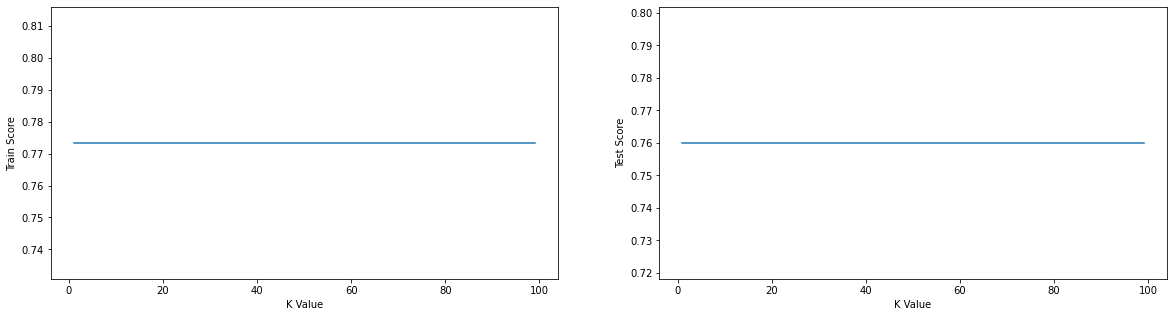

In [167]:
#Plot score of different k values for test and train datas
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(k_list,list(train_score_dict.values()))
plt.xlabel("K Value")
plt.ylabel("Train Score")

plt.subplot(1,2,2)
plt.plot(k_list,list(test_score_dict.values()))
plt.xlabel("K Value")
plt.ylabel("Test Score")
plt.show()

### Question
- Using only the classifier models of logistic regression, Gaussian Naive Bayes, or KNN models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement one of the methods you proposed. 
    - Is the model accuracy increasing? Why do you think this might have helped?
    - If it not increasing, try the other method you proposed. Why do you think this might have helped?
    - If none of them did not improve, comment on why this might have been the case.
    - If you have time try a few more solutions and see which one works. 

In [ ]:
# Code here

In [143]:
#Other way of improving accuracy is given below
# Method: SVM
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [145]:
y_pred_svc = svc_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred_svc))
# This method also helps in improving accuracy of the model as the accuracy is almost same to the other models

0.92


In [147]:
print(confusion_matrix(y_test, y_pred_svc)) #Confusion matrix

[[13  2]
 [ 0 10]]


In [148]:
print(classification_report(y_test, y_pred)) # Classification report

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.91      1.00      0.95        10

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

